In [ ]:
#import Libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
import datetime
import pandas as pd
import sqlalchemy as sa


In [ ]:
connection_string_Housing = "mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 18 for SQL Server};SERVER=KALLESPC;DATABASE=Housing;Encrypt=NO;Trusted_Connection=yes"
connection_string_GDP_GROWTH = "mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 18 for SQL Server};SERVER=KALLESPC;DATABASE=GDP_GROWTH_1998_2024_STATE;Encrypt=NO;Trusted_Connection=yes"
engine = sa.create_engine(connection_string_Housing)

#upload,read and show table
Housing_prices_df = pd.read_sql('hpi_po_monthly_hist', engine)
Housing_prices_df_arry = pd.read_sql('hpi_po_monthly_hist', engine)
Housing_prices_df_arry['array_hpi_values']= Housing_prices_df_arry[Housing_prices_df_arry.columns[1:]].apply(lambda row: row.values.tolist(),axis=1)
housing_prices_training = Housing_prices_df_arry[['column1','array_hpi_values']]
#print (Housing_prices_df.head())
print (housing_prices_training.head())

     column1                                   array_hpi_values
0 1991-01-01  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...
1 1991-02-01  [100.87000274658203, 100.86000061035156, 100.8...
2 1991-03-01  [101.31999969482422, 100.9000015258789, 100.80...
3 1991-04-01  [101.72000122070312, 100.97000122070312, 100.7...
4 1991-05-01  [102.31999969482422, 101.30000305175781, 101.0...


In [ ]:
print(Housing_prices_df.shape)
Housing_prices_df.sort_values(by = 'column1', inplace=True)

(411, 21)


Coefficients: [[0.44480533]
 [0.44091612]
 [0.5825031 ]
 [0.57675907]
 [0.58829431]
 [0.5834893 ]
 [1.01928918]
 [1.01250629]
 [0.65837842]
 [0.65154772]
 [0.83415606]
 [0.83058427]
 [0.71651913]
 [0.70893548]
 [0.61140828]
 [0.60545603]
 [0.70059326]
 [0.69624621]
 [0.66721901]
 [0.66105093]]
Intercept: [93.02325346 92.42418989 76.55924859 76.53568102 70.7870872  70.40561845
 53.67965868 54.01042009 67.87071962 67.90573396 48.71372582 48.68966569
 62.75401643 62.7294908  82.25993961 81.96526105 62.60750499 62.39595026
 68.68007874 68.56149395]


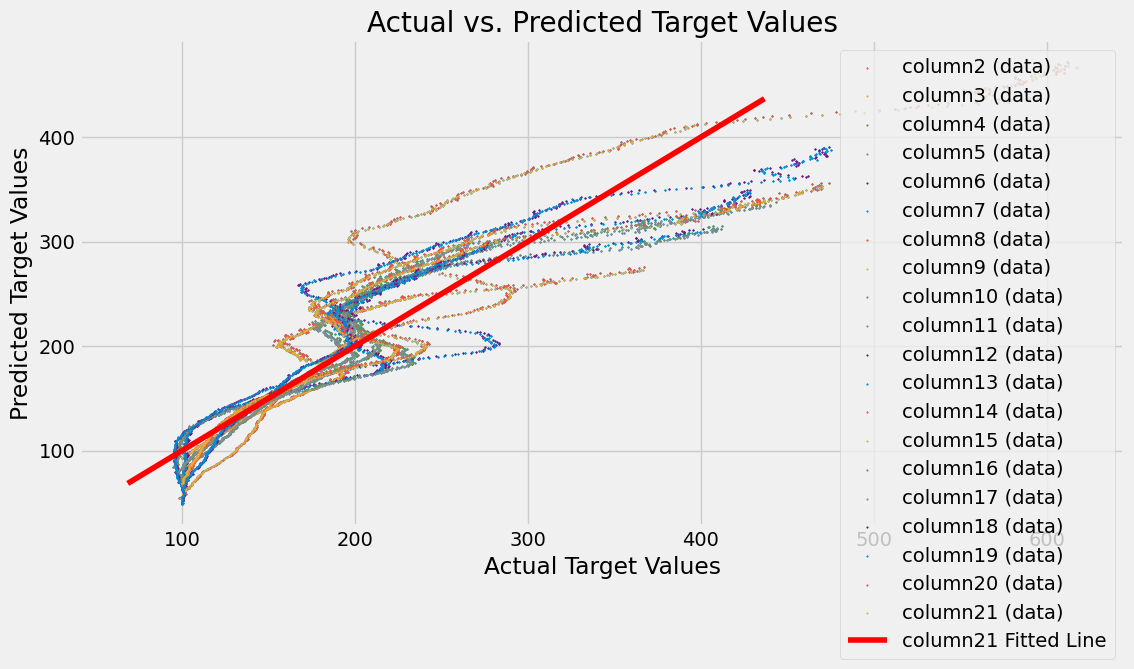

In [ ]:
Housing_prices_df['column1'] = np.arange(len(Housing_prices_df.index))
x = Housing_prices_df[['column1']]  # First column (as a DataFrame)
y = Housing_prices_df.iloc[:, 1:]  
model = LinearRegression()
model.fit(x,y)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
predictions = model.predict(x)
plt.figure(figsize=(12, 6))
plt.scatter(y, predictions, s=1)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted Target Values")
for i, col in enumerate(y.columns):
    plt.scatter(y[col], predictions[:, i], s=1, label=f'{col} (data)')  # Smaller dots (s=10)
min_val = min(y[col].min(), predictions[:, i].min())
max_val = max(y[col].max(), predictions[:, i].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='-', color='red', label=f'{col} Fitted Line')
plt.legend()
plt.show()

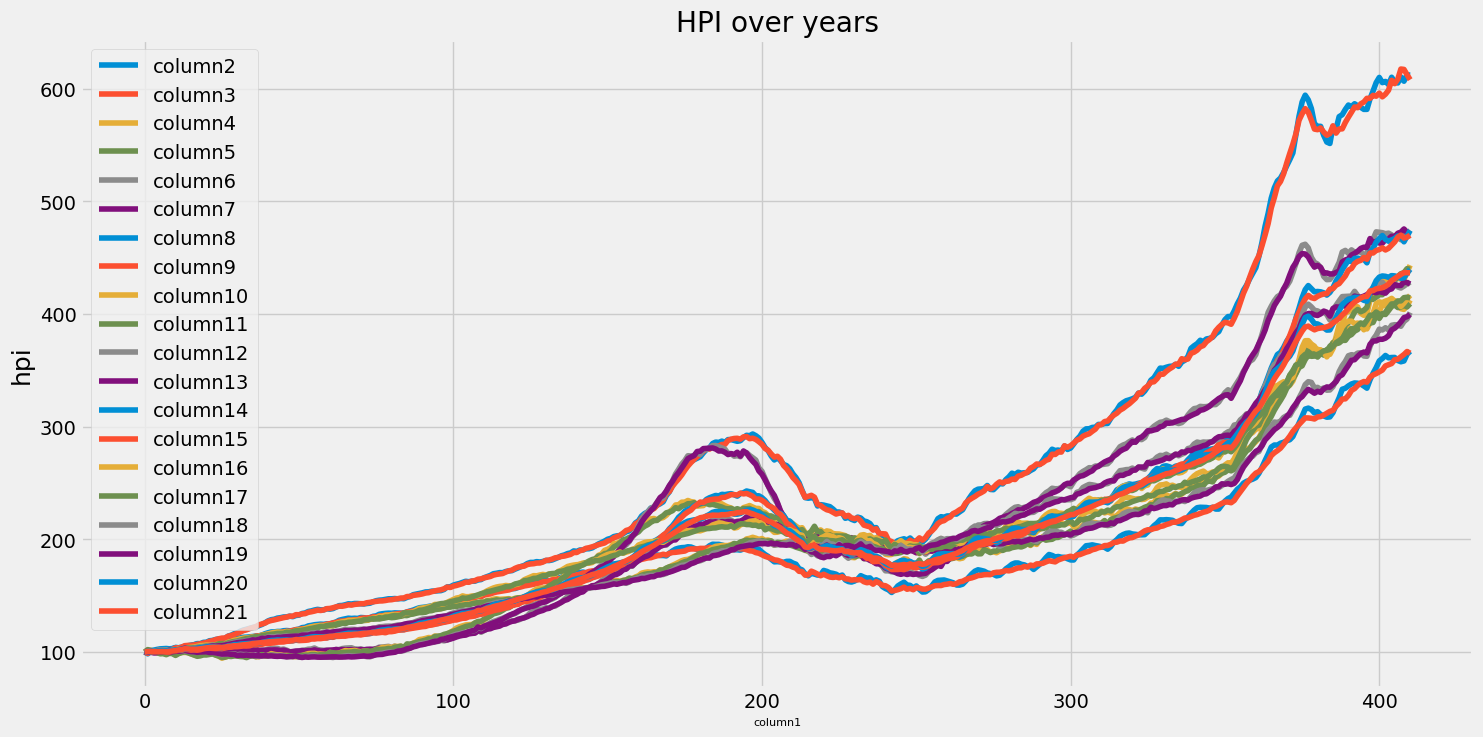

In [ ]:
#Visualize the data 
#Housing_prices_df['Year'] = pd.to_datetime(Housing_prices_df['Year'])
Housing_prices_df.set_index('column1',inplace=True)
Housing_prices_df.sort_index(inplace=True)
plt.figure(figsize=(16,8))
plt.title('HPI over years')
#plt.plot(Housing_prices_df['Year'],Housing_prices_df['avg_hpi'])
plt.xlabel('Date', fontsize=8)
plt.ylabel('hpi', fontsize=18)
Housing_prices_df.plot(ax=plt.gca())
plt.show()

In [ ]:
#create a new dataframe with only the "" column
hpivalues = np.array(Housing_prices_df_arry['array_hpi_values'].tolist())
#Convert the data frame to a numpy array
hpivalues = hpivalues.reshape((-1,20))
print(hpivalues.shape)
#get the number of rows to train the model on 
Training_data_len = math.ceil(len(hpivalues)*.83)


(411, 20)


In [ ]:
#Good practice to Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
#create variable to hold scaled data
#print(hpivalues.shape)
scaled_data = scaler.fit_transform(hpivalues)#<----computes minimum and maximum values that are used for scaling and transforms data based on those values

scaled_data.shape

(411, 20)

In [ ]:
#Create the training data set
#Create the Scaled training data set
train_data = scaled_data[0:Training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,:])
    if i<=60:
        print(x_train)
        print(y_train)
#the first 229 values(x_train) are the values that will train the data to predict the 230th value(y_train)

[array([0.        , 0.00325832, 0.00494363, 0.00644171, 0.00868881,
       0.01052394, 0.01127299, 0.0117224 , 0.01067375, 0.01153515,
       0.01490582, 0.01396953, 0.01441893, 0.01632898, 0.02071083,
       0.02217145, 0.02438112, 0.02606644, 0.02666568, 0.02820119,
       0.02820119, 0.03056067, 0.03149696, 0.03277031, 0.03138458,
       0.03123477, 0.03441819, 0.03816337, 0.04041047, 0.04467997,
       0.045429  , 0.04715178, 0.04887458, 0.0494738 , 0.05059736,
       0.05164601, 0.05254484, 0.05381822, 0.05651472, 0.0608966 ,
       0.06411746, 0.06681396, 0.06696377, 0.06842439, 0.06849931,
       0.07078387, 0.071458  , 0.07052171, 0.07123327, 0.07445413,
       0.07628929, 0.081158  , 0.08228156, 0.08685069, 0.08849854,
       0.09070821, 0.09168197, 0.09269315, 0.09216883, 0.0937418 ])]
[array([0.09310513, 0.09421511, 0.07558102, 0.07651017, 0.00593108,
       0.00940669, 0.07724037, 0.07686376, 0.01447861, 0.01358437,
       0.00100191, 0.00149862, 0.03602064, 0.03611853, 0.0

In [ ]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(282, 60)
(282, 20)


In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

(282, 60, 1)
(282, 20)


In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(20))
model.add(Dense(20))

d:\Python_programming_environment\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=32, validation_split=.1)

Epoch 1/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0136 - val_loss: 0.0100
Epoch 2/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025 - val_loss: 0.0187
Epoch 3/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 0.0101
Epoch 4/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 0.0098
Epoch 5/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 6/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 0.0085
Epoch 7/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.9229e-04 - val_loss: 0.0086
Epoch 8/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 9/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 10/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0072
Epoch 11/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7574e-04 - val_loss: 0.0089
Epoch 12/32
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
#Create the testing data set
test_data = scaled_data[Training_data_len - 60: , :  ]
#Create the data sets x_test and y_test
x_test = []
y_test = scaled_data[Training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1 ))
x_test.shape

(69, 40, 1)

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

np.float64(323.0419723199762)

C:\Users\kalle\AppData\Local\Temp\ipykernel_15780\765172050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:,1]


KeyError: "None of [Index([             100.0, 100.87000274658203, 101.31999969482422,\n       101.72000122070312, 102.31999969482422, 102.80999755859375,\n       103.01000213623047, 103.12999725341797,  102.8499984741211,\n       103.08000183105469,\n       ...\n        360.5400085449219,   363.239990234375,  361.1700134277344,\n       361.42999267578125,   361.489990234375,  358.7699890136719,\n        357.6499938964844,  358.3800048828125,  364.3800048828125,\n         367.010009765625],\n      dtype='float64', length=411)] are in the [columns]"

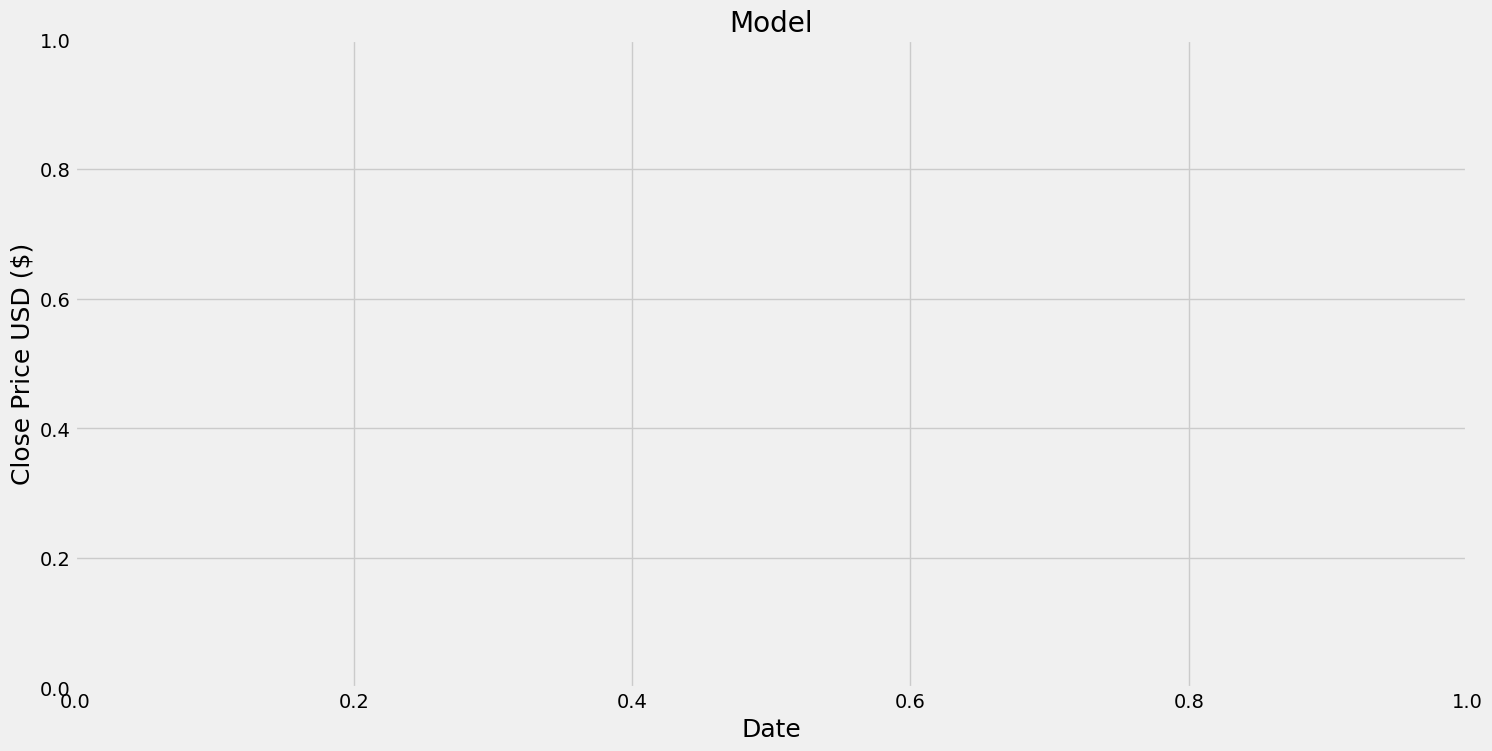

In [ ]:
train = Housing_prices_df_arry[:Training_data_len]
valid = Housing_prices_df_arry[Training_data_len:]
valid['Predictions'] = predictions[:,1]
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[Housing_prices_df['column2']])
plt.plot(valid[['array_hpi_values','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()